# <a id="homo"> JOB-A-THON - June 2022 by AnalyticsVidya</a>

## Smart Lead Scoring Engine

Can you identify the potential leads for a D2C startup?

### Problem Statement


A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 


Leads are captured in 2 ways - Directly and Indirectly. 


Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.


Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.


Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.

### About Dataset


You are provided with the leads data of last year containing both direct and indirect leads. Each lead provides information about their activity on the platform, signup information and campaign information. Based on his past activity on the platform, you need to build the predictive model to classify if the user would buy the product in the next 3 months or not.



#### Data Dictionary


You are provided with 3 files - train.csv, test.csv and sample_submission.csv



#### Training set


train.csv contains the leads information of last 1 year from Jan 2021 to Dec 2021. And also the target variable indicating if the user will buy the product in next 3 months or not 

|Variable|Description|
|--------|-----------|
|id      |Unique identifier of a lead|
|created_at|Date of lead dropped|
|signup_date|Sign up date of the user on the website|
|campaign_var (1 and 2)|campaign information of the lead|
|products_purchased|No. of past products purchased at the time of dropping the lead|
|user_activity_var (1 to 12)|Derived activities of the user on the website|
|buy|0 or 1 indicating if the user will buy the product in next 3 months or not| 


Test set


test.csv contains the leads information of the current year from Jan 2022 to March 2022. You need to predict if the lead will buy the product in next 3 months or not.

|Variable|Description|
|--------|-----------|
|id      |Unique identifier of a lead|
|created_at|Date of lead dropped|
|signup_date|Sign up date of the user on the website|
|campaign_var (1 and 2)|campaign information of the lead|
|products_purchased|No. of past products purchased at the time of dropping the lead|
|user_activity_var (1 to 12)|Derived activities of the user on the website|


#### Submission File Format


sample_submission.csv contains 2 variables - 

|Variable|Description|
|--------|-----------|
|id      |Unique identifier of a lead|
|buy|0 or 1 indicating if the user will buy the product in next 3 months or not| 

#### Evaluation metric

The evaluation metric for this hackathon would be F1 Score of Class 1.

#### Public and Private Split


Test data is further divided into Public (40%) and Private (60%) data. 


Your initial responses will be checked and scored on the Public data. The final rankings would be based on your private score which will be published once the competition is over.

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

In [3]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

## Load the Dataset (Train and Test)

In [4]:
train = pd.read_csv("train_wn75k28.csv")

train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [6]:
test = pd.read_csv("test_Wf7sxXF.csv")

test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

## Checking Null Values

In [8]:
train.isna().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [9]:
test.isna().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

###### Interpretation : 
In train and test dataset we are having lots of missing values in two columns which are "products_purchased" and "signup_date". but signup_date variable is not much important because here we are doing classification not timeseries. 

## Dropping Unnecessary Columns

In [10]:
train = train.drop(columns = ["created_at","signup_date"])
test = test.drop(columns = ["created_at","signup_date"])

## Filling the Null Values

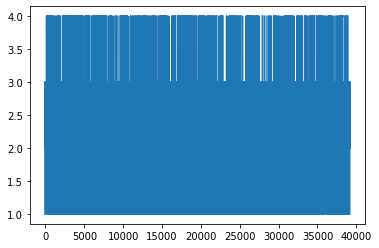

In [11]:
plt.plot(train["products_purchased"])
plt.show()

In [12]:
train["products_purchased"] = train["products_purchased"].fillna(train["products_purchased"].mean())
test["products_purchased"] = test["products_purchased"].fillna(test["products_purchased"].mean())

###### Interpretation : 
We are use mean for filling the null values, we can see in graph the all observations of product_purchased variables are stated closer to each other.

## Feature Engineering

In [13]:
train["buy"].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

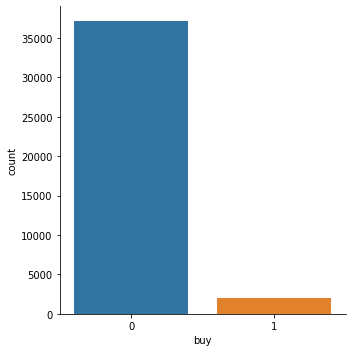

In [14]:
sns.catplot(data = train, x="buy",kind="count")
plt.show()

### Sampling

In [15]:
no_buy = train[train["buy"] == 0].index
buy = train[train["buy"] == 1].index

# Random_index for fraud with mejority class 
random_index = np.array(np.random.choice(buy, len(no_buy), replace = True))

oversample_index = np.concatenate([no_buy, random_index])

oversample = train.iloc[oversample_index,:]

In [16]:
oversample["buy"].value_counts()

0    37163
1    37163
Name: buy, dtype: int64

### Outliers

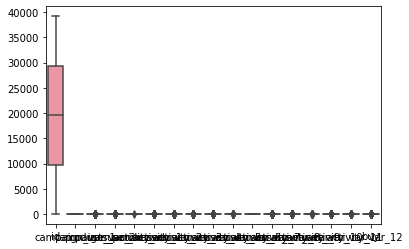

In [17]:
figsize= (30, 10)
sns.boxplot(data = train)
plt.show()

In [18]:
train.shape

(39161, 17)

In [19]:
Q1 = train.quantile(0.25)

Q3 = train.quantile(0.75)

IQR = Q3 - Q1 

print(IQR)

id                      19580.000000
campaign_var_1              5.000000
campaign_var_2              3.000000
products_purchased          0.154137
user_activity_var_1         1.000000
user_activity_var_2         0.000000
user_activity_var_3         0.000000
user_activity_var_4         0.000000
user_activity_var_5         0.000000
user_activity_var_6         1.000000
user_activity_var_7         1.000000
user_activity_var_8         0.000000
user_activity_var_9         0.000000
user_activity_var_10        0.000000
user_activity_var_11        0.000000
user_activity_var_12        0.000000
buy                         0.000000
dtype: float64


In [20]:
train = train[-((train < (Q1 - 1.5 * IQR))|(train > (Q3 + 1.5 * IQR ))).any(axis =1)]

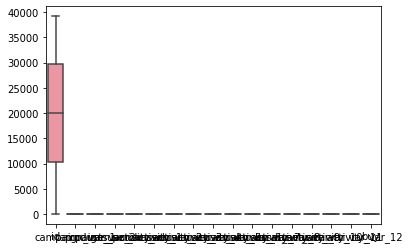

In [21]:
figsize= (30, 10)
sns.boxplot(data = train)
plt.show()

In [22]:
train.shape

(13882, 17)

## Split Dataset

In [19]:
xtrain = oversample.drop(columns = ["buy"])
ytrain = oversample["buy"]
x_test = test

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size = 0.2)

# Decision Tree

In [20]:
model = DecisionTreeClassifier()

model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
model.score(x_train, y_train)

1.0

In [22]:
y_pred = model.predict(x_val)
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [23]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7209
           1       1.00      0.97      0.98      7657

    accuracy                           0.98     14866
   macro avg       0.98      0.98      0.98     14866
weighted avg       0.98      0.98      0.98     14866



## Use Hyper Parameter Tunning

In [24]:
#hyperparameter
criterion =["gini", "entropy"]

#splitter =["best", "random"]
max_depth=list(range(1,11))

#grid
grid={"criterion":criterion,"max_depth":max_depth}

#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

# gridsearchcv
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
result=grid_cv.fit(x_train,y_train)

print(result.best_params_)
print(result.best_score_)

{'criterion': 'gini', 'max_depth': 10}
0.8381488956161005


In [25]:
model = DecisionTreeClassifier(criterion = "gini", max_depth = 10)

model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [26]:
y_pred = model.predict(x_val)

In [27]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      7574
           1       0.83      0.84      0.83      7292

    accuracy                           0.83     14866
   macro avg       0.83      0.83      0.83     14866
weighted avg       0.83      0.83      0.83     14866



## Apply on Testing Dataset

In [28]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
y_pred = pd.DataFrame(y_pred)
ID = test.drop(columns = ['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12'])

In [30]:
# adding column name to the respective columns
y_pred.columns =['buy']

In [31]:
Final_Submmision = pd.concat([ID, y_pred], axis=1)

In [32]:
Final_Submmision.to_csv('Final_Submmision_Decision_Tree.csv') 

# SVM

In [33]:
model = SVC()

model.fit(x_train,y_train)

model.score(x_train, y_train)

y_pred = model.predict(x_val)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.37      0.55      0.44      5070
           1       0.69      0.52      0.59      9796

    accuracy                           0.53     14866
   macro avg       0.53      0.53      0.52     14866
weighted avg       0.58      0.53      0.54     14866



In [ ]:
#parameter 
kernel = ["linear", "poly", "rbf", "sigmoid"]
C = [50, 10, 1]
grid = {"kernel":kernel, "C":C}

# cv
from sklearn.model_selection import RepeatedStratifiedKFold 
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 1)

# Grid Search CV 
from sklearn.model_selection import GridSearchCV 
grid_cv = GridSearchCV(estimator = model, param_grid = grid, cv = cv, n_jobs = 1)

res = grid_cv.fit(x_train, y_train)

res.best_params_

res.best_score_

In [ ]:
model = SVC()

model.fit(x_train,y_train)

model.score(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

In [ ]:
y_pred = pd.DataFrame(y_pred)

# adding column name to the respective columns
y_pred.columns =['buy']

Final_Submmision = pd.concat([ID, y_pred], axis=1)

Final_Submmision.to_csv('Final_Submmision_SVC.csv') 

# Random Forest

In [21]:
model = RandomForestClassifier()

model.fit(x_train,y_train)

model.score(x_train, y_train)

y_pred = model.predict(x_val)
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [22]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7290
           1       1.00      0.99      0.99      7576

    accuracy                           0.99     14866
   macro avg       0.99      0.99      0.99     14866
weighted avg       0.99      0.99      0.99     14866



In [ ]:
max_features=["sqrt","log2"]

n_estimators=[5,10,100,1000]

grid={"max_features":max_features,"n_estimators":n_estimators}

#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)

#Grid Search CV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=cv, scoring="accuracy")

res=grid_cv.fit(x_train,y_train)
print(res.best_params_)
print(res.best_score_)

In [24]:
model = RandomForestClassifier()

model.fit(x_train,y_train)

model.score(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
y_pred = pd.DataFrame(y_pred)
ID = test.drop(columns = ['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12'])
# adding column name to the respective columns
y_pred.columns =['buy']

Final_Submmision = pd.concat([ID, y_pred], axis=1)

Final_Submmision.to_csv('Final_Submmision_RandomForestClassifier.csv') 

# BaggingClassifier

In [27]:
model = BaggingClassifier()

model.fit(x_train,y_train)

model.score(x_train, y_train)

y_pred = model.predict(x_val)
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [28]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7278
           1       1.00      0.99      0.99      7588

    accuracy                           0.99     14866
   macro avg       0.99      0.99      0.99     14866
weighted avg       0.99      0.99      0.99     14866



In [29]:
model = RandomForestClassifier()

model.fit(x_train,y_train)

model.score(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
y_pred = pd.DataFrame(y_pred)
ID = test.drop(columns = ['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12'])
# adding column name to the respective columns
y_pred.columns =['buy']

Final_Submmision = pd.concat([ID, y_pred], axis=1)

Final_Submmision.to_csv('Final_Submmision_BaggingClassifier.csv') 